In [41]:
#This suppresses the warning messages from the jupyter cells 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

#This reads in the entire dataset
df = pd.read_csv('Nationwide Police Data - Sheet1.csv')

In [42]:
#remove county level police departments to focus on municipal level
df = df[df["agency_type"] != "sheriff"]

In [43]:
#Since many of the columns are not useful, this makes a copy that only has a sub-sample of the columns
df_sample = df[["agency_name", "calc_less_lethal_per_10k_arrests", "calc_killed_by_police_per_10k_arrests", "calc_unarmed_killed_by_police_per_10k_arrests",
               "calc_complaints_sustained", "calc_percent_use_of_force_complaints_sustained", "calc_percent_discrimination_complaints_sustained", 
               "calc_percent_criminal_complaints_sustained", "calc_low_level_arrests_per_1k_population", "calc_black_deadly_force_disparity_per_arrest", 
               "calc_jail_incarceration_per_1k_population", "calc_overall_disparity_index", "calc_police_violence_score", "calc_police_accountability_score", 
               "calc_police_spending_per_resident", "calc_percentile_police_spending"]]

#remove the dollar sign and convert budget to numbers 
df_sample["calc_police_spending_per_resident"] = df_sample["calc_police_spending_per_resident"].replace('[\$,]', '', regex=True).astype(float)

#remove % sign and convert to number 
df_sample["calc_complaints_sustained"] = df_sample["calc_complaints_sustained"].replace('[\%,]', '', regex=True).astype(float)
df_sample["calc_percent_use_of_force_complaints_sustained"] = df_sample["calc_percent_use_of_force_complaints_sustained"].replace('[\%,]', '', regex=True).astype(float)
df_sample["calc_percent_discrimination_complaints_sustained"] = df_sample["calc_percent_discrimination_complaints_sustained"].replace('[\%,]', '', regex=True).astype(float)
df_sample["calc_percent_criminal_complaints_sustained"] = df_sample["calc_percent_criminal_complaints_sustained"].replace('[\%,]', '', regex=True).astype(float)
df_sample["calc_percentile_police_spending"] = df_sample["calc_percentile_police_spending"].replace('[\%,]', '', regex=True).astype(float)
df_sample["calc_overall_disparity_index"] = df_sample["calc_overall_disparity_index"].replace('[\%,]', '', regex=True).astype(float)
df_sample["calc_police_violence_score"] = df_sample["calc_police_violence_score"].replace('[\%,]', '', regex=True).astype(float)
df_sample["calc_police_accountability_score"] = df_sample["calc_police_accountability_score"].replace('[\%,]', '', regex=True).astype(float)

#remove commas from population and convert to number 
#df_sample['total_population'] = df_sample['total_population'].str.replace(',', '').astype(float)

#produce corrlation matrix using pearson
df_sample.corr()

calc_less_lethal_per_10k_arrests  \
calc_less_lethal_per_10k_arrests                                          1.000000   
calc_killed_by_police_per_10k_arrests                                     0.161556   
calc_unarmed_killed_by_police_per_10k_arrests                            -0.004617   
calc_complaints_sustained                                                -0.067214   
calc_percent_use_of_force_complaints_sustained                           -0.054791   
calc_percent_discrimination_complaints_sustained                          0.046792   
calc_percent_criminal_complaints_sustained                                0.078945   
calc_low_level_arrests_per_1k_population                                 -0.073674   
calc_black_deadly_force_disparity_per_arrest                             -0.117015   
calc_jail_incarceration_per_1k_population                                -0.336403   
calc_overall_disparity_index                                              0.036190   
calc_police_violence_score                                               -0.429365   
calc_police_accountability_score                                         -0.059192   
calc_police_spending_per_resident                                         0.066608   
calc_percentile_police_spending                                          -0.015441   

                                                  calc_killed_by_police_per_10k_arrests  \
calc_less_lethal_per_10k_arrests                                               0.161556   
calc_killed_by_police_per_10k_arrests                                          1.000000   
calc_unarmed_killed_by_police_per_10k_arrests                                  0.477476   
calc_complaints_sustained                                                     -0.055343   
calc_percent_use_of_force_complaints_sustained                                -0.039324   
calc_percent_discrimination_complaints_sustained                              -0.043065   
calc_percent_criminal_complaints_sustained                                    -0.016646   
calc_low_level_arrests_per_1k_population                                      -0.076343   
calc_black_deadly_force_disparity_per_arrest                                   0.100254   
calc_jail_incarceration_per_1k_population                                     -0.197678   
calc_overall_disparity_index                                                  -0.025165   
calc_police_violence_score                                                    -0.492695   
calc_police_accountability_score                                               0.092258   
calc_police_spending_per_resident                                              0.020346   
calc_percentile_police_spending                                               -0.036225   

                                                  calc_unarmed_killed_by_police_per_10k_arrests  \
calc_less_lethal_per_10k_arrests                                                      -0.004617   
calc_killed_by_police_per_10k_arrests                                                  0.477476   
calc_unarmed_killed_by_police_per_10k_arrests                                          1.000000   
calc_complaints_sustained                                                             -0.046100   
calc_percent_use_of_force_complaints_sustained                                        -0.019963   
calc_percent_discrimination_complaints_sustained                                      -0.043179   
calc_percent_criminal_complaints_sustained                                             0.062228   
calc_low_level_arrests_per_1k_population                                              -0.097912   
calc_black_deadly_force_disparity_per_arrest                                           0.107078   
calc_jail_incarceration_per_1k_population                                             -0.034416   
calc_overall_disparity_index                                                           0.078340   
calc_police_violence_score  

Matplotlib is building the font cache using fc-list. This may take a moment.


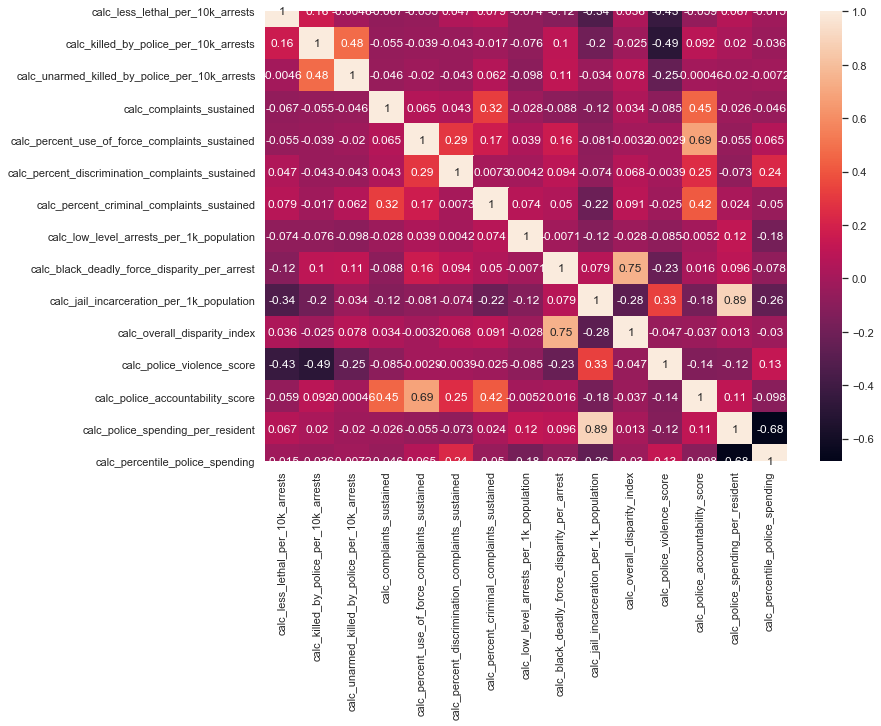

In [68]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(rc={'figure.figsize':(11.7,8.27)})

#view the correlation matrix as a heatmap (no idea why the seaborn library makes the higher correlation lighter by default)
sn.heatmap(df_sample.corr(), annot=True)
plt.show()

In [104]:
import plotly.express as px

df["calc_percentile_police_spending"] = df["calc_percentile_police_spending"].replace('[\%,]', '', regex=True).astype(float)
df["calc_percentile_unarmed_killed_by_police"] = df["calc_percentile_unarmed_killed_by_police"].replace('[\%,]', '', regex=True).astype(float)

fig = px.scatter(df, x="calc_percentile_police_spending", y="calc_percentile_unarmed_killed_by_police", hover_data=["agency_name"], trendline="ols", color="rural-urban")
fig.show()

In [58]:
#looking at police spending per resident affects violence scores
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Violence Score", "Accountability Score", "Overall Disparity Index", "Black Deadly Force Disparity Index"))

fig.add_trace(go.Scatter(x=df_sample["calc_police_spending_per_resident"], y=df_sample["calc_police_violence_score"], mode='markers'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df_sample["calc_police_spending_per_resident"], y=df_sample["calc_police_accountability_score"], mode='markers'),
              row=1, col=2)

fig.update_layout(height=700, width=900,
                  title_text="Police Spending per Resident Comparison")

fig.show()

In [59]:
#Same as above but examining police spending as a fraction of overal budget
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Violence Score", "Accountability Score"))

fig.add_trace(go.Scatter(x=df["calc_percentile_police_spending"], y=df_sample["calc_police_violence_score"], mode='markers'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df["calc_percentile_police_spending"], y=df_sample["calc_police_accountability_score"], mode='markers'),
              row=1, col=2)

fig.update_layout(height=700, width=900,
                  title_text="Police Spending per % of Municipal Budget Comparison")

fig.show()

In [66]:
#look at munipcal budget versus violence score 

df["total_budget"] = df["total_budget"].replace('[\$,]', '', regex=True).astype(float)
df["education_budget"] = df["education_budget"].replace('[\$,]', '', regex=True).astype(float)
df["housing_budget"] = df["housing_budget"].replace('[\$,]', '', regex=True).astype(float)
df["health_budget"] = df["health_budget"].replace('[\$,]', '', regex=True).astype(float)
df["police_budget"] = df["police_budget"].replace('[\$,]', '', regex=True).astype(float)

df['calc_percentile_education_spending'] = df["education_budget"] / df["total_budget"]
df['calc_percentile_housing_spending'] = df["housing_budget"] / df["total_budget"]
df['calc_percentile_health_spending'] = df["health_budget"] / df["total_budget"]



In [67]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Police Spending", "Housing Spending", "Health Spending", "Education Spending"))

fig.add_trace(go.Scatter(x=df["police_budget"]/ df["total_budget"], y=df_sample["calc_police_violence_score"], mode='markers'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df['calc_percentile_housing_spending'], y=df_sample["calc_police_violence_score"], mode='markers'),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df['calc_percentile_health_spending'], y=df_sample["calc_police_violence_score"], mode='markers'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df['calc_percentile_education_spending'], y=df_sample["calc_police_violence_score"], mode='markers'),
              row=2, col=2)

fig.update_layout(height=700, width=900,
                  title_text="Violence Score (y axis) per Municipal Spending (% by category)")

fig.show()

In [71]:
#what about relationship to PD size and violence score 

total = df["Female Employees Officers 2018"] + df["Male Employees Officers 2018"]

fig = px.scatter(df_sample, x=total, y="calc_police_violence_score", hover_data=["agency_name"], trendline="ols")
fig.show()

In [88]:
#Rural versus Urban Score? 
df_ru = pd.read_csv('ruralurbancodes2013.csv')

def fix_fips(row):
    t = str(row["fips_state_code"]) + str(row["fips_county_code"]).zfill(3)
    return int(t)
df['fips_county_code_fixed'] = df.apply(fix_fips, axis=1)

In [109]:
df['rural-urban'] = df['fips_county_code_fixed'].map(df_ru.set_index('fips_county_code')['RUCC_2013'])

total = df["Female Employees Officers 2018"] + df["Male Employees Officers 2018"]
df["calc_police_violence_score"] = df["calc_police_violence_score"].replace('[\%,]', '', regex=True).astype(float)

fig = px.scatter(df, x=total, y="calc_police_violence_score", hover_data=["agency_name"], color="rural-urban")
fig.show()

In [106]:
df['rural-urban'].corr(df['calc_percentile_unarmed_killed_by_police'])

-0.16703027547674437

In [107]:
fig = px.scatter(df, x="black_population", y="calc_percentile_police_spending", hover_data=["agency_name"], trendline="ols", color="rural-urban")
fig.show()

In [108]:
#remove the dollar sign and convert budget to numbers 
df["calc_police_spending_per_resident"] = df["calc_police_spending_per_resident"].replace('[\$,]', '', regex=True).astype(float)

fig = px.scatter(df, x="black_population", y="calc_police_spending_per_resident", hover_data=["agency_name"], trendline="ols", color="rural-urban")
fig.show()

In [110]:
df['black_population'].corr(df['calc_police_spending_per_resident'])

0.06968451619950658

In [113]:
total = df["homicides_2013_2018_solved"]/df["homicides_2013_2018"]
fig = px.scatter(df, x="calc_police_spending_per_resident", y=total, hover_data=["agency_name"], trendline="ols")
fig.show()

In [116]:
fig = px.scatter(df, x="calc_police_spending_per_resident", y="less_lethal_force_2018", hover_data=["agency_name"], trendline="ols", color="rural-urban")
fig.show()